In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import make_scorer, silhouette_score, adjusted_rand_score
# from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score, adjusted_rand_score

In [ ]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [77]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [78]:
df.drop(['CustomerID'], inplace=True, axis=1)

In [79]:
df['Gender'] = df['Gender'].map({'Male':0, 'Female':1})

In [80]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


In [81]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [82]:
X.shape, y.shape

((200, 3), (200,))

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [84]:
X_train.shape, y_train.shape

((160, 3), (160,))

In [85]:
X_test.shape, y_test.shape

((40, 3), (40,))

In [87]:
# --- Custom Silhouette scorer ---
def silhouette_scorer(estimator, X):
    labels = estimator.fit_predict(X)
    return silhouette_score(X, labels)

In [88]:
params = {
    'n_clusters': [2, 3, 4, 5, 6, 7, 8],  # possible k values
    'init': ['k-means++', 'random'],
    'max_iter': [100, 300, 500]
}

In [94]:
kmeans = KMeans()
cv = GridSearchCV(kmeans, param_grid=params, scoring=make_scorer(silhouette_scorer), cv=5, verbose=1, n_jobs=-1) # cv=[(slice(None), slice(None))]
cv.fit(X_train)
# pred = cv.predict(X_test)

# --- Step 2: Define custom scoring function (Silhouette Score) ---
# def silhouette_scorer(estimator, X):
#     labels = estimator.fit_predict(X)
#     return silhouette_score(X, labels)

# grid = GridSearchCV(
#     kmeans,
#     param_grid,
#     scoring=make_scorer(silhouette_scorer),  # custom scorer
#     cv=[(slice(None), slice(None))],  # trick to bypass CV
#     verbose=1,
#     n_jobs=-1
# )

Fitting 5 folds for each of 42 candidates, totalling 210 fits


C:\Users\91787\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan]
  warnings.warn(


GridSearchCV(cv=5, estimator=KMeans(), n_jobs=-1,
             param_grid={'init': ['k-means++', 'random'],
                         'max_iter': [100, 300, 500],
                         'n_clusters': [2, 3, 4, 5, 6, 7, 8]},
             scoring=make_scorer(silhouette_scorer, response_method='predict'),
             verbose=1)

In [95]:
print("Best Parameters:", cv.best_params_)
print("Best Silhouette Score:", cv.best_score_)

Best Parameters: {'init': 'k-means++', 'max_iter': 100, 'n_clusters': 2}
Best Silhouette Score: nan


In [96]:
kmeans = KMeans(
    n_clusters=2,
    init='k-means++',
    max_iter=100,
)

kmeans.fit(X_train)
pred = kmeans.predict(X_test)
print("Predicted Clusters:", pred)

Predicted Clusters: [1 0 0 1 1 1 0 1 1 0 0 1 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 1
 1 1 0]


In [97]:
ari = adjusted_rand_score(y_test, pred)
print("Adjusted Rand Index (Accuracy-like):", ari)

Adjusted Rand Index (Accuracy-like): 0.0031680690921565067


Silhouette Score → measures cluster quality (good if >0.5).

Adjusted Rand Index (ARI) → only if you have ground-truth labels. Range:

1.0 = perfect clustering

0.0 = random

<0 = worse than random

In [99]:
# ari = adjusted_rand_score(true_labels, kmeans.labels_)
# print("Adjusted Rand Index:", ari)

# ch = calinski_harabasz_score(X, kmeans.labels_)
# print("Calinski-Harabasz Index:", ch)

# dbi = davies_bouldin_score(X, kmeans.labels_)
# print("Davies-Bouldin Index:", dbi)

print("Inertia (WCSS):", kmeans.inertia_)

print(len(X))          # should be 200

Inertia (WCSS): 72634.7694235589
200


In [101]:
# score = silhouette_score(X, kmeans.labels_)
# print("Silhouette Score:", score)

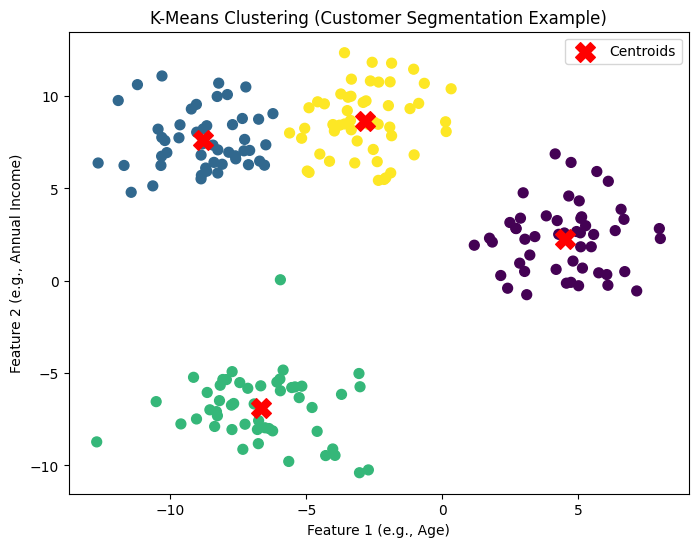

In [102]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# --- Step 1: Create sample customer data (Age vs Annual Income) ---
X, _ = make_blobs(n_samples=200, centers=4, cluster_std=1.8, random_state=42)

# --- Step 2: Apply K-Means ---
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X)

# Cluster labels for each point
labels = kmeans.labels_

# Cluster centers
centroids = kmeans.cluster_centers_

# --- Step 3: Visualization ---
plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c=labels, cmap="viridis", s=50)   # Points
plt.scatter(centroids[:,0], centroids[:,1], c="red", marker="X", s=200, label="Centroids")  # Centers
plt.title("K-Means Clustering (Customer Segmentation Example)")
plt.xlabel("Feature 1 (e.g., Age)")
plt.ylabel("Feature 2 (e.g., Annual Income)")
plt.legend()
plt.show()
